In [67]:
import psycopg2
from pprint import pprint

payload_fields='{"ensor":"data"}'
class DatabaseConnection:
	def __init__(self):
		try:
			self.connection= psycopg2.connect(
			"dbname='emrp2018' user='emrp2018' host='hsrw.space' password='emrp2018!'")
			self.connection.autocommit=True
			self.cursor=self.connection.cursor()
			pprint("connected to database")
		except:
			pprint("Cannot connect to database")

	def insertTTNGateway(self):
		postgres_insert_query = """ INSERT INTO public."SensorData" ("DeviceId","Level","Battery",app_id,dev_id,hardware_serial,
        port,counter,payload_raw,"time",frequency,modulation,data_rate,airtime,coding_rate,"TTNGatewayId",payload_fields)
         VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""

		record_to_insert = ("504","23","12","emrp2018","emrp2018dev01","08B5679A6D7G",1,7,"AKEO","2019-02-11",
        868,"LORA","SF7BW125",51456000,"4/5",380,str(payload_fields))
		self.cursor.execute(postgres_insert_query, record_to_insert)
        #self.connection.commit()

if __name__ == '__main__':
	Database_Connection=DatabaseConnection()
	Database_Connection.insertTTNGateway()     

'connected to database'


'connected to database'
0 insert 1.0
1 insert 1.2475
2 insert 1.555484359375
3 insert 1.9383066202380994
4 insert 2.413490693912477
5 insert 3.002301024066591
6 insert 3.7303417514854607
7 insert 4.628138565399637
8 insert 5.731624040298198
9 insert 7.082401265024437
10 insert 8.727600562083497
11 insert 10.71907317367617
12 insert 13.111595142838652
13 insert 15.95970911057404
14 insert 19.3128556009822
15 insert 23.208603522566776
16 insert 27.66415620953922
17 insert 32.666931414959556
18 insert 38.16584324852526
19 insert 44.06572508347908
20 insert 50.22768603651696
21 insert 56.4775564341889
22 insert 62.622659590793646
23 insert 68.47433075293101
24 insert 73.87107851100927
25 insert 78.69650753781235
26 insert 82.88778367564305
27 insert 86.43376788790331
28 insert 89.36521928162928
29 insert 91.74116805890239
30 insert 93.63535528159855
31 insert 95.12524470522023
32 insert 96.28452543095521
33 insert 97.17888219503337
34 insert 97.86426488210128
35 insert 98.3867952503414
36 

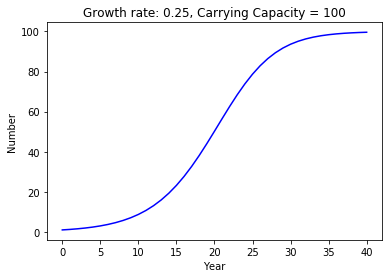

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
import psycopg2
from pprint import pprint
payload_fields='{"level":"2.4"}'

class DatabaseConnection:
	def __init__(self):
		try:
			self.connection= psycopg2.connect(
			"dbname='emrp2018' user='emrp2018' host='hsrw.space' password='emrp2018!'")
			self.connection.autocommit=True
			self.cursor=self.connection.cursor()
			pprint("connected to database")
		except:
			pprint("Cannot connect to database")
            
	def insertTTNGateway(self):
		postgres_insert_query = """ INSERT INTO public."SensorData" ("DeviceId","Level","Battery",app_id,dev_id,hardware_serial,
        port,counter,payload_raw,"time",frequency,modulation,data_rate,airtime,coding_rate,"TTNGatewayId",payload_fields)
         VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"""

		record_to_insert = ("504","23","12","emrp2018","emrp2018dev01","08B5679A6D7G",1,7,"AKEO","2019-02-11",
        868,"LORA","SF7BW125",51456000,"4/5",380,str(payload_fields))
		self.cursor.execute(postgres_insert_query, record_to_insert)            

if __name__ == '__main__':
    Database_Connection=DatabaseConnection()
    r = .25 # growth rate / yr .25
    K = 100 # carrying capacity
    t = 40 # number of years
    num = np.zeros(t+1)

    num[0] = 1
    for i in range(t):
        num[i+1] = num[i]+r*num[i]*(1-num[i]/K)
        print(i,'insert',num[i])
        if i<=1:
            time.sleep(i)
            Database_Connection.insertTTNGateway() 
       
        else:
            time.sleep(num[i]-num[i-1])
            Database_Connection.insertTTNGateway() 
       

print(num)    
print('insert')
plt.plot(range(t+1),num, 'b')

plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Growth rate: 0.25, Carrying Capacity = 100')
#plt.axvline(np.argmax(np.diff(num)),  color = 'k'  )
plt.show()